Friday 30 AUG 2024

Dataset: Hand Sign Images Dataset (https://www.kaggle.com/datasets/ash2703/handsignimages)
The data set includes 27,455 gray-scale images of size 28*28 pixels.

• Import libraries

In [ ]:
import cv2
import numpy as np
from skimage import feature
import glob

• Load an image file

In [ ]:
imgGray = cv2.imread('Your image file’)
#imgGray = cv2.cvtColor(imgRBG, cv2.COLOR_BGR2GRAY)
r,c = imgGray.shape

• Flatten the image

In [ ]:
raw_vector = imgResized.flatten()
print(raw_vector.shape

• Calculate the HOG of the image

In [ ]:
hog_vector = feature.hog(imgResized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
block_norm="L1")
print(hog_vector.shape)

• Perform Canny edge detection

In [ ]:
edges = cv2.Canny(image=imgResized, threshold1=100, threshold2=200)

• Calculate Moments

In [ ]:
moments = cv2.moments(edges)

• Calculate Hu Moments

In [ ]:
moments_hu = cv2.HuMoments(moments)
moments_vector = moments.flatten()
print(moments_vector.shape)

• Create a function for construct histogram of features

In [ ]:
def hist_feature(im, block_size = 8):
    r,c = im.shape
    n_bins = int(im.max() + 1)
    feature = []
    for i in range(0, block_size, r ):
        for j in range(0, block_size, c):
            hist,_ = np.histogram(im[i:np.min(i+block_size-1,r-1),
                                     j:np.min(j+block_size-1,c-1)], bins= bins)
            feature.append(hist)
    return np.array(feature)

• Calculate LBP array

In [ ]:
radius = 3
n_points = 8 * radius
lbp = feature.local_binary_pattern(imgGray, n_points, radius, ‘default’)

• Extract LBP feature vector

In [ ]:
lbp_vector = hist_feature(lbp, block_size = 8)

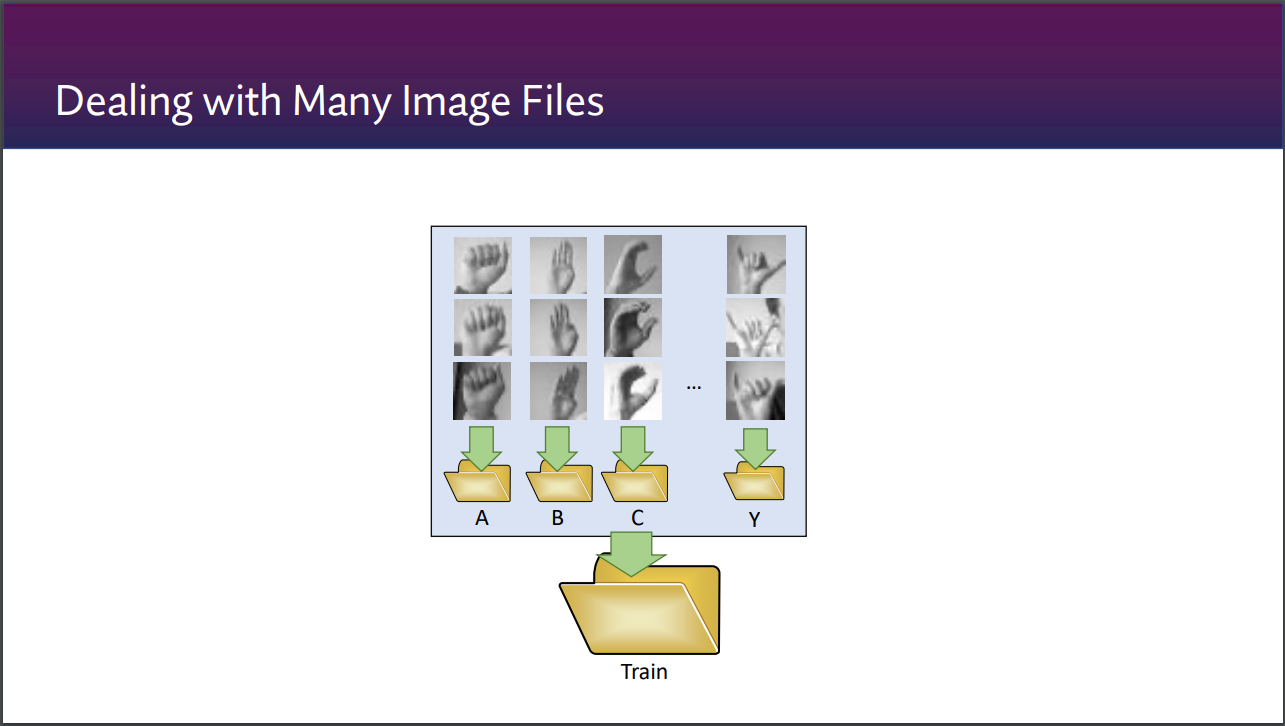

• List all JPEG files in all subfolder in the corpus

In [ ]:
X_train = []
y_train = []

for dirname, _, filenames in os.walk('/kaggle/input/handsignimages/Train'):
    for filename in filenames:
        img_file = os.path.join(dirname, filename)

        imgRGB = cv2.imread(img_file)
        imgGray = cv2.cvtColor(imgRBG, cv2.COLOR_BGR2GRAY)

        hog_vector = feature.hog(imgGray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L1")
        X_train = np.append(X_train, hog_vector, axis=0)

print(X_train.shape)

In [ ]:
X_train = []
y_train = []

for dirname, _, filenames in os.walk('/kaggle/input/handsignimages/Train'):
    for filename in filenames:
        img_file = os.path.join(dirname, filename)
        y_train.append(img_file.split('/')[5])
        imgRGB = cv2.imread(img_file)
        imgGray = cv2.cvtColor(imgRBG, cv2.COLOR_BGR2GRAY)

        hog_vector = feature.hog(imgGray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L1")
        X_train.append(hog_vector)

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)

In [ ]:
# ใน 1 Block จะมี 256 ตำแหน่ง
def hist_feature(im, block_size = 8, bins=8):
    r,c = im.shape
    n_bins = int(im.max() + 1)
    feature = []
    for i in range(0, r, block_size):
        for j in range(0, c, block_size):
            hist,_ = np.histogram(im[i:min(i+block_size-1,r-1),
                                     j:min(j+block_size-1,c-1)],
                                     bins=bins)
            feature = np.append(feature, hist)
    return np.transpose(feature)

radius = 3
n_points = 8
lbp = feature.local_binary_pattern(imgGray, n_points, radius, 'default')
print(lbp.shape)

lbp_vector = hist_feature(lbp, block_size = 8, bins=2**(n_points))
print(lbp_vector)
print("LBP Vector =", lbp_vector.shape)

lbp_vector.shape